In [31]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Load Images

In [60]:
def load_images(directory):
    image_files = [os.path.join(directory, image_filename) for image_filename in os.listdir(directory)]
    images = []
    for image_path in image_files:
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        images += [image]
    
    return images

In [61]:
IMAGE_PATH = 'images/'
images = load_images(IMAGE_PATH)

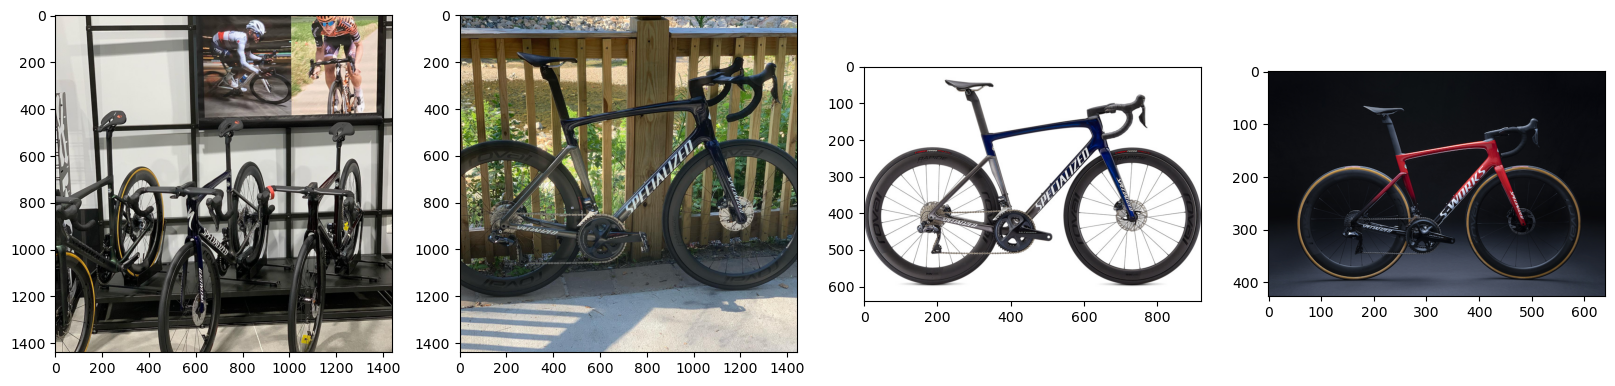

In [62]:
fig, axs = plt.subplots(1, 4, figsize=(20,20))
for i, image in enumerate(images):
    axs[i].imshow(image)

### Preprocess images

In [82]:
def resize_and_normalize(image):
    mean = [0.485, 0.456, 0.406] 
    std  = [0.229, 0.224, 0.225]
    height, width = 416, 416

    # Scale image pixels from 0-255 to 0-1
    scaled_image = image/255
    print(scaled_image.mean(axis=1))
    # Normalize image by center image pixels distribution
    normalized_image = (scaled_image-mean)/std
    # Resize image to 416, 416
    resized_image = cv2.resize(normalized_image, (height, width))


    return resized_image

In [83]:
processed_images = [resize_and_normalize(image) for image in images]

[[0.55242375 0.52190904 0.48232026]
 [0.55146786 0.52118736 0.48081972]
 [0.54910675 0.51932462 0.47788126]
 ...
 [0.64074891 0.60865196 0.54674564]
 [0.64120915 0.60910403 0.54699346]
 [0.64105664 0.6090659  0.54690359]]
[[0.50365741 0.5073366  0.48005719]
 [0.50742919 0.51098039 0.48466776]
 [0.50884259 0.51186275 0.48689542]
 ...
 [0.74927015 0.76074346 0.75590142]
 [0.75276144 0.76398148 0.75831155]
 [0.75599946 0.76703431 0.76092593]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 ...
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[0.04552083 0.05302083 0.07018995]
 [0.04553309 0.05291667 0.07011642]
 [0.04564338 0.05296569 0.07018382]
 ...
 [0.29509804 0.32500613 0.39699142]
 [0.29589461 0.32628676 0.39820466]
 [0.29646446 0.32709559 0.39890319]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


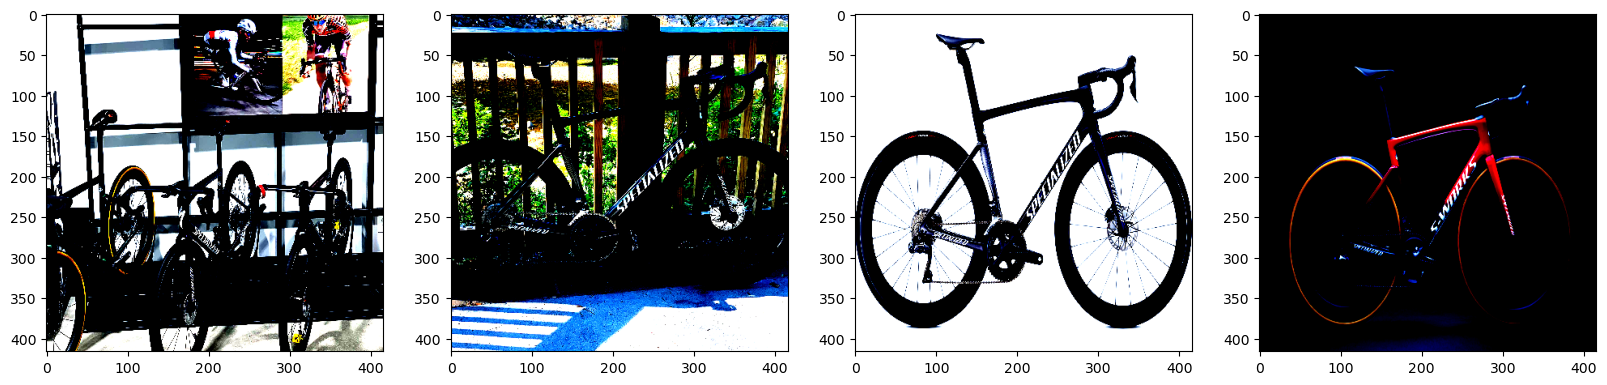

In [80]:
fig, axs = plt.subplots(1, 4, figsize=(20,20))
for i, image in enumerate(processed_images):
    axs[i].imshow(image)